In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import os
import openpyxl
import uuid





In [3]:

# Usando cadenas raw
source1_df = pd.read_excel(r'C:\Users\jazpi\Documents\TheBridge_DSPT_ML\PROYECTO_FINAL_ML\01_data\01_raw\BookingList-010122a311222.xlsx')
source2_df = pd.read_excel(r'C:\Users\jazpi\Documents\TheBridge_DSPT_ML\PROYECTO_FINAL_ML\01_data\01_raw\BookingList-010123a311223.xlsx')
source3_df = pd.read_excel(r'C:\Users\jazpi\Documents\TheBridge_DSPT_ML\PROYECTO_FINAL_ML\01_data\01_raw\BookingList-010124a301124.xlsx')

# Verificar los datos cargados
print("Source 1 DataFrame:")
print(source1_df.head())

print("Source 2 DataFrame:")
print(source2_df.head())

print("Source 3 DataFrame:")
print(source3_df.head())


Source 1 DataFrame:
   Posición   Llegada    Salida   Apartamento Huésped  \
0  32518147  31.12.22  01.01.23     HD OLIVIA     NaN   
1  32518144  31.12.22  01.01.23      HD FIDEL     NaN   
2  32518120  31.12.22  01.01.23  HD ALEJANDRA     NaN   
3  32518117  31.12.22  01.01.23  H BMA LISBOA     NaN   
4  32489530  30.12.22  31.12.22     HD OLIVIA     NaN   

         Portal de reserva          Creado Email Teléfono  Dirección  ...  \
0  Cerrar fechas (bloqueo)  31.12.22 21:56   NaN      NaN        NaN  ...   
1  Cerrar fechas (bloqueo)  31.12.22 21:56   NaN      NaN        NaN  ...   
2  Cerrar fechas (bloqueo)  31.12.22 21:56   NaN      NaN        NaN  ...   
3  Cerrar fechas (bloqueo)  31.12.22 21:55   NaN      NaN        NaN  ...   
4  Cerrar fechas (bloqueo)  30.12.22 22:03   NaN      NaN        NaN  ...   

   Precio  Detalles de precios Comisión incluida City tax Pagado  \
0     NaN                  NaN               NaN      NaN     No   
1     NaN                  NaN        

In [4]:
# Combinar los DataFrames de origen en uno solo
combined_source_df = pd.concat([source1_df, source2_df, source3_df], ignore_index=True)
print(combined_source_df.head())

   Posición   Llegada    Salida   Apartamento Huésped  \
0  32518147  31.12.22  01.01.23     HD OLIVIA     NaN   
1  32518144  31.12.22  01.01.23      HD FIDEL     NaN   
2  32518120  31.12.22  01.01.23  HD ALEJANDRA     NaN   
3  32518117  31.12.22  01.01.23  H BMA LISBOA     NaN   
4  32489530  30.12.22  31.12.22     HD OLIVIA     NaN   

         Portal de reserva          Creado Email Teléfono  Dirección  ...  \
0  Cerrar fechas (bloqueo)  31.12.22 21:56   NaN      NaN        NaN  ...   
1  Cerrar fechas (bloqueo)  31.12.22 21:56   NaN      NaN        NaN  ...   
2  Cerrar fechas (bloqueo)  31.12.22 21:56   NaN      NaN        NaN  ...   
3  Cerrar fechas (bloqueo)  31.12.22 21:55   NaN      NaN        NaN  ...   
4  Cerrar fechas (bloqueo)  30.12.22 22:03   NaN      NaN        NaN  ...   

   Precio  Detalles de precios Comisión incluida City tax Pagado  \
0     NaN                  NaN               NaN      NaN     No   
1     NaN                  NaN               NaN      NaN 

In [5]:
combined_source_df.describe()

,Posición,Dirección,Adultos,Niños,Precio,Comisión incluida,City tax,Pago por adelantado,Número de noches
count,1.571200e+04,0.0,13268.000000,2922.000000,14243.000000,12637.000000,0.0,4.000000,15712.000000
mean,4.186600e+07,NaN,2.644860,1.761807,230.484998,35.101689,NaN,255.000000,1.916815
std,1.457977e+07,NaN,1.371533,0.719993,292.402928,38.592220,NaN,366.378675,12.117033
min,1.539014e+07,NaN,1.000000,1.000000,1.150000,0.170000,NaN,40.000000,1.000000
25%,2.951609e+07,NaN,2.000000,1.000000,81.950000,13.350000,NaN,40.000000,1.000000
50%,4.144487e+07,NaN,2.000000,2.000000,148.000000,23.100000,NaN,90.000000,1.000000
75%,5.354794e+07,NaN,3.000000,2.000000,272.000000,42.040000,NaN,305.000000,2.000000
max,6.985467e+07,NaN,8.000000,7.000000,7847.600000,867.750000,NaN,800.000000,1491.000000


In [6]:
combined_source_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15712 entries, 0 to 15711
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Posición                 15712 non-null  int64  
 1   Llegada                  15712 non-null  object 
 2   Salida                   15712 non-null  object 
 3   Apartamento              15712 non-null  object 
 4   Huésped                  14337 non-null  object 
 5   Portal de reserva        15712 non-null  object 
 6   Creado                   15712 non-null  object 
 7   Email                    10909 non-null  object 
 8   Teléfono                 13144 non-null  object 
 9   Dirección                0 non-null      float64
 10  Adultos                  13268 non-null  float64
 11  Niños                    2922 non-null   float64
 12  Check-in                 10953 non-null  object 
 13  Check-out                10855 non-null  object 
 14  Notas                 

In [7]:
combined_source_df['Creado']

0        31.12.22 21:56
1        31.12.22 21:56
2        31.12.22 21:56
3        31.12.22 21:55
4        30.12.22 22:03
              ...      
15707    23.10.23 12:17
15708    26.09.23 14:51
15709    25.09.23 23:26
15710    25.09.23 23:26
15711    26.08.23 11:09
Name: Creado, Length: 15712, dtype: object

In [8]:
combined_source_df




,Posición,Llegada,Salida,Apartamento,Huésped,Portal de reserva,Creado,Email,Teléfono,Dirección,...,Precio,Detalles de precios,Comisión incluida,City tax,Pagado,Pago por adelantado,Adelanto ya pagado,Número de noches,Estado,Nota para colaboradores
0,32518147,31.12.22,01.01.23,HD OLIVIA,NaN,Cerrar fechas (bloqueo),31.12.22 21:56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,No,1,Reservado,NaN
1,32518144,31.12.22,01.01.23,HD FIDEL,NaN,Cerrar fechas (bloqueo),31.12.22 21:56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,No,1,Reservado,NaN
2,32518120,31.12.22,01.01.23,HD ALEJANDRA,NaN,Cerrar fechas (bloqueo),31.12.22 21:56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,No,1,Reservado,NaN
3,32518117,31.12.22,01.01.23,H BMA LISBOA,NaN,Cerrar fechas (bloqueo),31.12.22 21:55,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,No,1,Reservado,NaN
4,32489530,30.12.22,31.12.22,HD OLIVIA,NaN,Cerrar fechas (bloqueo),30.12.22 22:03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,No,1,Reservado,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15707,48020365,17.06.24,21.06.24,H - BUA 3P,Navarra Adentro,Reserva directa,23.10.23 12:17,NaN,659636268,NaN,...,520.00,NaN,NaN,NaN,No,NaN,No,4,Reservado,NaN
15708,46670629,11.02.24,12.02.24,H BMA AMSTERDAM,Crespi Catalina,Booking.com,26.09.23 14:51,ccatal.288618@guest.booking.com,+34 617 49 18 56,NaN,...,159.25,TVA - EUR 14.48,23.89,NaN,Sí,NaN,No,1,Cancelado,NaN
15709,46642321,12.01.24,14.01.24,H BMA BERLIN,Mikel Zugasti Rezola,Booking.com,25.09.23 23:26,mrezol.585471@guest.booking.com,+34 666 22 54 76,NaN,...,521.60,TVA - EUR 47.42,78.24,NaN,Sí,NaN,No,2,Cancelado,NaN
15710,46642318,12.01.24,14.01.24,H BMA AMSTERDAM,Mikel Zugasti Rezola,Booking.com,25.09.23 23:26,mrezol.585471@guest.booking.com,+34 666 22 54 76,NaN,...,671.80,TVA - EUR 61.07,100.77,NaN,Sí,NaN,No,2,Cancelado,NaN


In [9]:
#SACAR EL IDIOMA POR EL TELÉFONO -> Pendiente

In [10]:
# Función para generar un token único
def generate_token():
    return str(uuid.uuid4())

# Tokenizar los datos sensibles
combined_source_df['Huésped_Token'] = combined_source_df['Huésped'].apply(lambda x: generate_token())
combined_source_df['Teléfono_Token'] = combined_source_df['Teléfono'].apply(lambda x: generate_token())
combined_source_df['Email_Token'] = combined_source_df['Email'].apply(lambda x: generate_token())

# Eliminar las columnas originales
combined_source_df = combined_source_df.drop(columns=['Huésped', 'Teléfono', 'Email'])

# Mostrar el DataFrame resultante
print(combined_source_df)


       Posición   Llegada    Salida      Apartamento        Portal de reserva  \
0      32518147  31.12.22  01.01.23        HD OLIVIA  Cerrar fechas (bloqueo)   
1      32518144  31.12.22  01.01.23         HD FIDEL  Cerrar fechas (bloqueo)   
2      32518120  31.12.22  01.01.23     HD ALEJANDRA  Cerrar fechas (bloqueo)   
3      32518117  31.12.22  01.01.23     H BMA LISBOA  Cerrar fechas (bloqueo)   
4      32489530  30.12.22  31.12.22        HD OLIVIA  Cerrar fechas (bloqueo)   
...         ...       ...       ...              ...                      ...   
15707  48020365  17.06.24  21.06.24       H - BUA 3P          Reserva directa   
15708  46670629  11.02.24  12.02.24  H BMA AMSTERDAM              Booking.com   
15709  46642321  12.01.24  14.01.24     H BMA BERLIN              Booking.com   
15710  46642318  12.01.24  14.01.24  H BMA AMSTERDAM              Booking.com   
15711  45005552  08.01.24  10.01.24      HG0 MUGARRA                   Airbnb   

               Creado  Dire

array([[<Axes: title={'center': 'Posición'}>,
        <Axes: title={'center': 'Dirección'}>,
        <Axes: title={'center': 'Adultos'}>],
       [<Axes: title={'center': 'Niños'}>,
        <Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'Comisión incluida'}>],
       [<Axes: title={'center': 'City tax'}>,
        <Axes: title={'center': 'Pago por adelantado'}>,
        <Axes: title={'center': 'Número de noches'}>]], dtype=object)

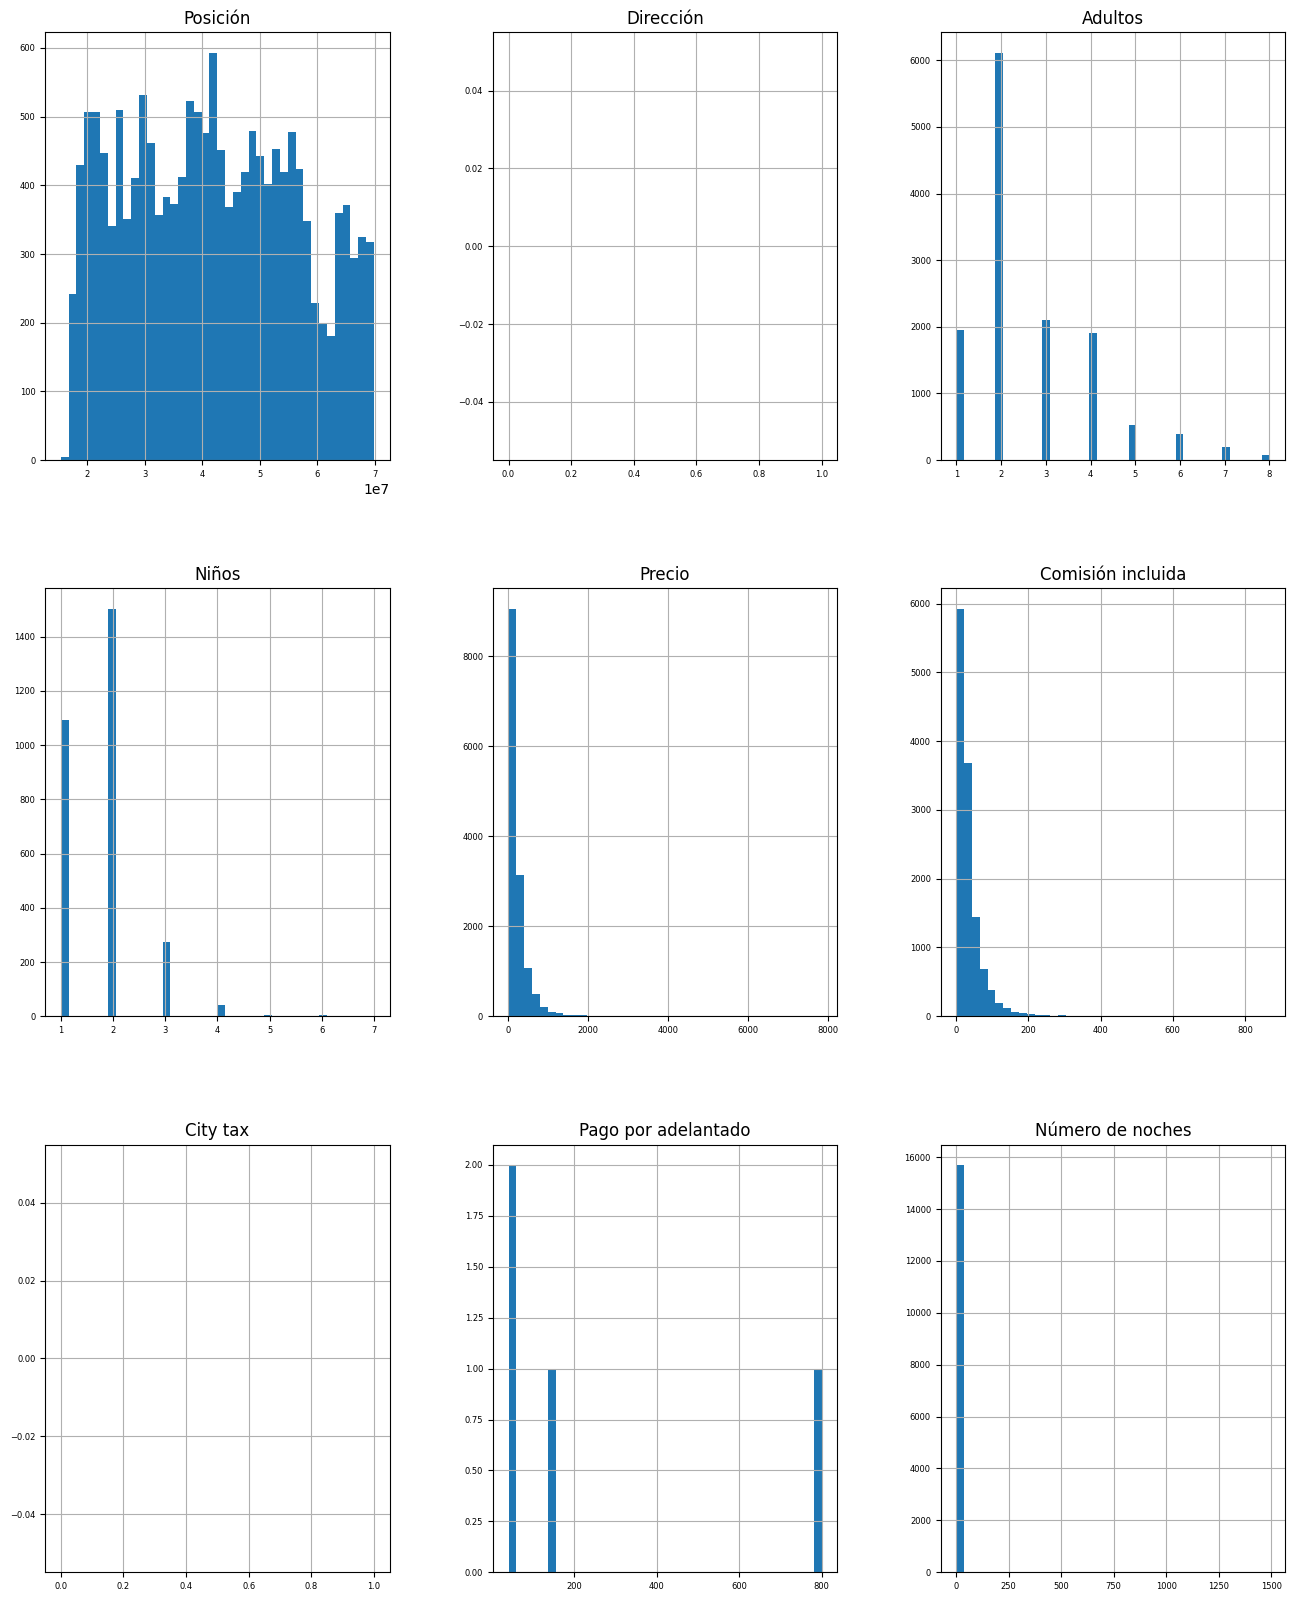

In [12]:
df_num = combined_source_df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

In [11]:
# Guardar el DataFrame en un archivo CSV en la carpeta 'data/cleaned/'
output_path = '../01_data/02_processed/combined_source_df.csv'
combined_source_df.to_csv(output_path, index=False)

print(f"DataFrame guardado en {output_path}")

DataFrame guardado en ../01_data/02_processed/combined_source_df.csv
